# Homework: AER Credit Card

In [1]:
# Import package. 

# Data Manipulation.
import pandas as pd
import numpy as np
import wget

# Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Other packages.
%matplotlib inline

In [2]:
# Scikit Learn Packages.
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
# Data url. 
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'

# Data extration with wget.
response = wget.download(url, 'data/aer_credit_card.csv')

100% [.............................................................] 73250 / 73250

In [4]:
# Import Dataset. 
aercc_data = pd.read_csv('data/aer_credit_card.csv')

# Checking data frame. 
aercc_data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [5]:
# Converting data to card to 1 & 0. 
aercc_data['card'] = pd.to_numeric((aercc_data.card == 'yes').astype(int))

# Checking aercc dataset. 
aercc_data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [6]:
aercc_data.shape

(1319, 12)

In [7]:
# Import packages. 
from IPython.display import display

In [8]:
# Splitting Data set 
aercc_full_train, aercc_test = train_test_split(aercc_data, test_size = 0.2, random_state = 42)

# Checking splitted data. 
display(aercc_full_train)
print('\n\n')
display(aercc_test)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
598,1,0,43.58333,4.3681,0.044293,160.47920,yes,no,2,110,1,10
1213,1,0,28.08333,5.4700,0.029192,133.06830,yes,no,3,18,1,0
209,1,0,30.66667,3.8000,0.032519,102.97670,no,no,0,26,0,1
538,0,0,37.16667,1.6800,0.000714,0.00000,yes,no,3,120,0,8
140,1,0,36.41667,3.0000,0.113059,282.56330,no,no,2,16,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,33.25000,3.7000,0.000324,0.00000,yes,no,2,72,1,0
1130,1,0,39.08333,5.1000,0.049524,210.22830,yes,no,3,60,0,22
1294,1,0,31.58333,2.5500,0.142905,303.67420,no,no,1,60,1,7
860,1,0,27.16667,2.2000,0.007310,12.65083,no,no,0,60,0,2


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
677,1,0,32.58333,1.8142,0.054141,81.435000,yes,no,0,9,1,22
1046,1,0,23.91667,2.0000,0.100191,166.901700,no,no,0,9,1,0
610,1,0,36.75000,3.0000,0.032497,80.825840,yes,no,3,134,0,4
49,1,0,27.75000,7.0000,0.110585,644.828300,yes,no,0,0,1,13
1284,1,0,49.16667,3.1144,0.008495,21.465000,yes,no,1,154,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1176,1,0,53.25000,3.9600,0.002424,7.083333,yes,no,1,180,0,5
1002,1,1,37.08333,5.4900,0.160214,732.979200,yes,no,1,60,1,19
1159,1,0,31.00000,5.1120,0.029746,126.386700,yes,no,2,16,1,19
542,0,4,25.41667,4.0000,0.000300,0.000000,no,no,0,36,1,32


In [9]:
# Resetting index. 
aercc_full_train = aercc_full_train.reset_index(drop = True)
aercc_test = aercc_test.reset_index(drop = True)

# Viewing dataset
display(aercc_full_train)
display(aercc_test)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,43.58333,4.3681,0.044293,160.47920,yes,no,2,110,1,10
1,1,0,28.08333,5.4700,0.029192,133.06830,yes,no,3,18,1,0
2,1,0,30.66667,3.8000,0.032519,102.97670,no,no,0,26,0,1
3,0,0,37.16667,1.6800,0.000714,0.00000,yes,no,3,120,0,8
4,1,0,36.41667,3.0000,0.113059,282.56330,no,no,2,16,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,33.25000,3.7000,0.000324,0.00000,yes,no,2,72,1,0
1051,1,0,39.08333,5.1000,0.049524,210.22830,yes,no,3,60,0,22
1052,1,0,31.58333,2.5500,0.142905,303.67420,no,no,1,60,1,7
1053,1,0,27.16667,2.2000,0.007310,12.65083,no,no,0,60,0,2


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,32.58333,1.8142,0.054141,81.435000,yes,no,0,9,1,22
1,1,0,23.91667,2.0000,0.100191,166.901700,no,no,0,9,1,0
2,1,0,36.75000,3.0000,0.032497,80.825840,yes,no,3,134,0,4
3,1,0,27.75000,7.0000,0.110585,644.828300,yes,no,0,0,1,13
4,1,0,49.16667,3.1144,0.008495,21.465000,yes,no,1,154,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,0,53.25000,3.9600,0.002424,7.083333,yes,no,1,180,0,5
260,1,1,37.08333,5.4900,0.160214,732.979200,yes,no,1,60,1,19
261,1,0,31.00000,5.1120,0.029746,126.386700,yes,no,2,16,1,19
262,0,4,25.41667,4.0000,0.000300,0.000000,no,no,0,36,1,32


In [10]:
# Spliting Full train data. 
aercc_train, aercc_val = train_test_split(aercc_full_train, test_size = 0.25, random_state = 42)

# Displaying dataframe. 
display(aercc_train)
display(aercc_val)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
869,0,7,25.916670,2.6000,0.000462,0.000000,no,no,3,36,1,11
137,1,0,0.166667,3.2400,0.184366,497.705800,yes,no,3,25,1,16
323,1,0,38.500000,3.2618,0.002943,7.083333,no,no,4,18,1,0
817,1,0,26.666670,2.2160,0.030756,56.463330,no,no,0,10,1,2
752,1,0,18.500000,2.5000,0.211532,440.690800,no,no,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,4,42.416670,1.8000,0.000667,0.000000,no,no,2,48,1,10
466,1,0,24.666670,3.0740,0.250803,642.474200,no,no,0,4,1,0
121,1,0,49.166670,5.2000,0.016642,71.530000,yes,no,1,15,1,6
1044,0,0,34.500000,3.3000,0.000364,0.000000,yes,no,2,33,0,18


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
260,1,0,30.25000,4.5060,0.133742,502.20170,no,no,2,38,1,7
832,1,0,39.75000,3.5000,0.034969,101.49420,yes,no,0,12,1,0
846,1,0,26.91667,1.9000,0.026674,41.81667,no,no,0,18,1,9
1006,1,0,51.75000,4.7232,0.021655,84.90250,yes,no,1,60,0,0
88,1,0,21.16667,1.5000,0.026553,32.77500,no,no,0,20,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
542,1,0,31.41667,3.0000,0.069171,172.57170,yes,no,1,24,1,13
865,0,0,34.58333,3.4000,0.000353,0.00000,no,no,0,12,1,0
261,0,1,24.25000,2.0000,0.000600,0.00000,no,no,0,52,0,3
298,1,0,48.25000,5.0000,0.021942,91.17667,no,no,3,7,1,0


In [11]:
# Reset index. 
aercc_train = aercc_train.reset_index(drop = True)
aercc_val = aercc_val.reset_index(drop = True)

# Viewing 
display(aercc_train)
display(aercc_val)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,7,25.916670,2.6000,0.000462,0.000000,no,no,3,36,1,11
1,1,0,0.166667,3.2400,0.184366,497.705800,yes,no,3,25,1,16
2,1,0,38.500000,3.2618,0.002943,7.083333,no,no,4,18,1,0
3,1,0,26.666670,2.2160,0.030756,56.463330,no,no,0,10,1,2
4,1,0,18.500000,2.5000,0.211532,440.690800,no,no,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
786,0,4,42.416670,1.8000,0.000667,0.000000,no,no,2,48,1,10
787,1,0,24.666670,3.0740,0.250803,642.474200,no,no,0,4,1,0
788,1,0,49.166670,5.2000,0.016642,71.530000,yes,no,1,15,1,6
789,0,0,34.500000,3.3000,0.000364,0.000000,yes,no,2,33,0,18


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,30.25000,4.5060,0.133742,502.20170,no,no,2,38,1,7
1,1,0,39.75000,3.5000,0.034969,101.49420,yes,no,0,12,1,0
2,1,0,26.91667,1.9000,0.026674,41.81667,no,no,0,18,1,9
3,1,0,51.75000,4.7232,0.021655,84.90250,yes,no,1,60,0,0
4,1,0,21.16667,1.5000,0.026553,32.77500,no,no,0,20,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,0,31.41667,3.0000,0.069171,172.57170,yes,no,1,24,1,13
260,0,0,34.58333,3.4000,0.000353,0.00000,no,no,0,12,1,0
261,0,1,24.25000,2.0000,0.000600,0.00000,no,no,0,52,0,3
262,1,0,48.25000,5.0000,0.021942,91.17667,no,no,3,7,1,0


In [12]:
# Splitting Y variable. 
y_full_traind = aercc_full_train['card'].values
y_train = aercc_train['card']
y_val = aercc_val['card'].values
y_test = aercc_test['card'].values

# Deleting median_house_value from main dataset. 
del aercc_full_train['card']
del aercc_train['card']
del aercc_val['card']
del aercc_test['card']

# show data columns. 
print(aercc_full_train.columns, '\n\n')
print(aercc_train.columns, '\n\n')
print(aercc_val.columns, '\n\n')
print(aercc_test.columns, '\n\n')

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object') 


Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object') 


Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object') 


Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object') 




## Question #1.

In [13]:
aercc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reports      791 non-null    int64  
 1   age          791 non-null    float64
 2   income       791 non-null    float64
 3   share        791 non-null    float64
 4   expenditure  791 non-null    float64
 5   owner        791 non-null    object 
 6   selfemp      791 non-null    object 
 7   dependents   791 non-null    int64  
 8   months       791 non-null    int64  
 9   majorcards   791 non-null    int64  
 10  active       791 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 68.1+ KB


In [14]:
numeric = aercc_train.columns[aercc_train.dtypes != 'object'].to_list()

numeric

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [15]:
# import packages. 
from sklearn.metrics import roc_auc_score
roc_auc_score?

In [19]:
for c in numeric:
    auc = roc_auc_score(y_train, aercc_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -aercc_train[c])
    print('%9s, %.3f' % (c, auc))

  reports, 0.727
      age, 0.507
   income, 0.592
    share, 0.992
expenditure, 0.992
dependents, 0.555
   months, 0.540
majorcards, 0.549
   active, 0.561


In [21]:
# Creating an instance of the model. 
dv = DictVectorizer(sparse = False)

In [22]:
# Converting training data to dict. 
dict_train = aercc_train.to_dict(orient = 'records')

In [23]:
# fit and trainform the dataset. 
x_train = dv.fit_transform(dict_train)

In [24]:
# Checking x
x_train

array([[1.100000e+01, 2.591667e+01, 3.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 4.615385e-04],
       [1.600000e+01, 1.666667e-01, 3.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.843664e-01],
       [0.000000e+00, 3.850000e+01, 4.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.943160e-03],
       ...,
       [6.000000e+00, 4.916667e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.664154e-02],
       [1.800000e+01, 3.450000e+01, 2.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 3.636364e-04],
       [1.200000e+01, 4.833333e+01, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 3.187233e-02]])

In [30]:
# Creating a training instance. 
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000)

# Fitting the model to the data. 
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [31]:
# Converting val to dict. 
dict_val = aercc_val.to_dict(orient = 'records')

# Getting x_val 
x_val = dv.transform(dict_val)

# Checking x_val
x_val

array([[7.000000e+00, 3.025000e+01, 2.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.337421e-01],
       [0.000000e+00, 3.975000e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 3.496943e-02],
       [9.000000e+00, 2.691667e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.667368e-02],
       ...,
       [3.000000e+00, 2.425000e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 6.000000e-04],
       [0.000000e+00, 4.825000e+01, 3.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.194240e-02],
       [1.400000e+01, 3.733333e+01, 2.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 5.719193e-02]])

In [32]:
# Predicting with validataion dataset. 
prediction = model.predict(x_val)

# Checking prediction. 
prediction

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [33]:
# Checking_accuracy. 
pred_accuracy = prediction == y_val

# Viewing 
pred_accuracy.mean().round(2)

0.98

## Qustion #2: 


In [35]:
roc_auc_score?

In [36]:
roc_auc_score(y_val, prediction)

0.9793303017775941

## Question #3: 

In [38]:
# Defining the tpr-fpr-score. 
def tpr_fpr_score(y_val, y_predict): 
    # Evaluating different threshold.
    threshold = np.linspace(0, 1, 101)

    # Score List. 
    score = []
    
    # Creating loop
    for t in threshold: 
        tp = ((y_predict >= t) & (y_val == 1)).sum()
        fp = ((y_predict >= t) & (y_val == 0)).sum()
        tn = ((y_predict < t) & (y_val == 0)).sum()
        fn = ((y_predict < t) & (y_val == 1)).sum()
        
        r = tp/ (tp + fn)
        p = tp/ (tp + fp)
        score.append((t, tp, fp, tn, fn, r, p))

    # Converting Data to a dataframe. 
    df_score = pd.DataFrame(score)
    df_score.columns = ['threshold', 'tp', 'fp', 'tn', 'fn', 'r', 'p']
    
    # Getting tpr & fpv. 
    df_score['fpr'] = df_score.fp / (df_score.fp + df_score.tn)
    df_score['tpr'] = df_score.tp / (df_score.tp + df_score.fn)

    return df_score 
    

In [40]:
df_score = tpr_fpr_score(y_val, prediction)

df_score[['r', 'p']]

,r,p
0,1.00000,0.776515
1,0.97561,0.995025
2,0.97561,0.995025
3,0.97561,0.995025
4,0.97561,0.995025
...,...,...
96,0.97561,0.995025
97,0.97561,0.995025
98,0.97561,0.995025
99,0.97561,0.995025


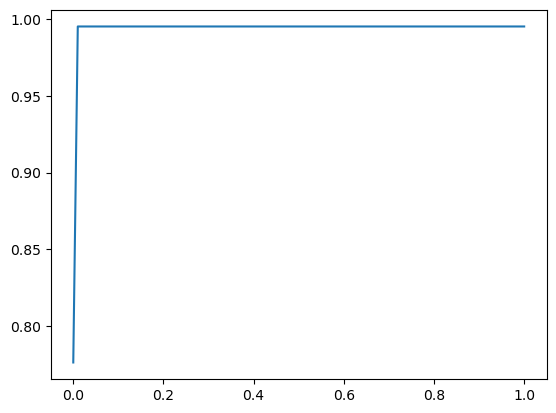

In [45]:
# plt.plot(df_score.threshold, df_score.r)
plt.plot(df_score.threshold, df_score.p)